# `pandas` 学习簿

`pandas` 是 `Python` 数据科学与数据分析领域无可替代的核心库，说它奠定了 Python 在结构化数据处理领域的生态基石，毫不夸张。

`pandas` 这个名字，是 *Panel Data*（经济学中常用的多维面板数据）与 *Python Data Analysis* 两个概念的融合（这种结合领域特性与工具定位的命名方式，也让它在众多 Python 库中极具辨识度）。

它构建在 `numpy` 强大的数组计算基础之上，提供了更贴合实际业务场景的结构化数据处理能力，核心是 ``Series` 对象`（一维标签数据）与 `DataFrame`（二维表格数据）这两个灵活高效的数据结构，成为处理海量结构化数据的 “标配容器”。

`pandas` 是开源软件包，它的开发始于 2008 年，由美国量化分析师 _Wes McKinney_ 发起。当时他在对冲基金 AQR Capital Management 处理金融数据时，发现现有 Python 工具（包括 `numpy`）在结构化表格数据的标签索引、缺失值处理等场景下存在明显不足，无法满足金融分析的高效性与灵活性需求。于是，Wes 基于实际业务痛点，着手开发一款专门面向结构化数据的处理库，而这正是 `pandas` 的雏形。

值得一提的是，`pandas` 从诞生起就与 Python 生态深度绑定，它依赖 `numpy` 实现底层计算，同时为 `matplotlib`（可视化）、`scikit-learn`（机器学习）、`statsmodels`（统计分析）等库提供数据输入支持，形成了 “数据处理 - 分析 - 可视化 - 建模” 的完整工作流。

下面是 `pandas` 的主要功能及特点：
* 核心数据结构：`Series`（一维带标签数组，支持多数据类型，索引是其核心标识）与 `DataFrame`（二维表格结构，可存储不同类型列数据，通过行索引与列名双重定位，适配绝大多数业务数据场景）；
* 全场景数据读写：支持 CSV、Excel、JSON、HTML、数据库（MySQL、SQLite 等）、HDF5、Parquet 等几乎所有主流数据格式，无需手动编写解析逻辑，一键实现数据导入导出；
* 高效数据清洗：内置缺失值处理、重复值删除、数据类型转换、异常值识别等功能，快速解决 **“脏数据”** 问题；
* 灵活索引与筛选：提供标签索引、位置索引、布尔索引等多种方式，支持单条件、多条件组合筛选，轻松定位目标数据；
* 强大分组聚合：通过 `groupby()` 实现按单列/多列分组，结合 `sum()/mean()` 等内置函数计算统计指标；
* 生态无缝集成：作为数据 “中间枢纽”，可直接与 `numpy`（数组计算）、`matplotlib/seaborn`（可视化）、`scikit-learn`（机器学习预处理）对接，无需频繁转换数据格式；
* 高性能处理能力：底层基于 `numpy` 且核心算法用 C 语言实现，处理百万级、千万级数据的速度远超纯 `Python` 循环，满足大规模数据处理需求。

这份工作簿将带你快速入门 `pandas`，掌握其核心数据结构与常用操作。而 `pandas` 的高级特性（如多层索引、自定义函数优化、大数据分块处理等），则需要你在实际业务场景中进一步探索 —— 而这里，只是你结构化数据处理之旅的起点🕖。

⚠ 注意：本工作簿假定你已掌握 Python 基础语法，且对 `numpy` 有初步了解（如数组概念、基本运算）。若你是 Python 初学者，建议先通过 [编程思维与实践](https://slp.shuishan.net.cn/book/9Wd2sIcOOh6) 掌握编程基础能力；若对 `numpy` 不熟悉，也可先学习 `numpy` 的[基础知识](../workbooks/numpy.ipynb)，为 `pandas` 学习打下更扎实的基础。

## 准备工作

你可以通过 `pip` 来安装 `pandas`：
```bash
pip install pandas
```
安装成功后，就可以在你的程序中引入 `pandas` 库(导入 `pandas` 一般使用简短的别名 `pd` 代替)：

In [1]:
import pandas as pd

可以通过一个简单的实例来验证 `pandas` 是否安装成功：

In [2]:
# 创建一个简单的 DataFrame
data = {'Name': ['Data', 'Power', 'Science'], 'ID': [1, 2, 3]}
df = pd.DataFrame(data)

# 查看 DataFrame
print(df)

      Name  ID
0     Data   1
1    Power   2
2  Science   3


学习 `pandas` 的关键在于理解两个重要的数据类型：`Series` 和 `DataFrame`。

`Series` 是一种一维数组，能够存储任意数据类型（整数、字符串、浮点数等），并且具有索引功能。可以将其视为带有标签的一维数据。

`DataFrame` 是一种二维表格数据结构，类似于电子表格或数据库中的表。它由多个 `Series` 组成，具有行索引和列索引，能够存储不同类型的数据。

理解这两个数据类型的特点和用法，是学习 `pandas` 的基础。

## Series

如前所述，`Series` 是 `pandas` 的核心结构之一，可以看作带标签的一维数组，它类似于 `dict` + `list` 的结合：既可以像 `dict` 一样用标签（*label*，类似 `dict` 中的 *key*）来检索数据，也可以像 `list` 一样通过位置来访问数据。

`Series` 对象可以存储任何数据类型（`int`, `float`, `str`, `object`, `list`, etc.）。

### 创建 Series 对象

可以从列表或者数组中创建 `Series` 对象：

In [3]:
import pandas as pd

s = pd.Series([10, 20, 30, 40])
print(s)

0    10
1    20
2    30
3    40
dtype: int64


从输出的内容可以看到，`Series` 由两部分组成：左边一列是索引（*index*），右边一列是数据值（*values*），最下面的 `dtype` 表示里面存储的数据类型。

还可以注意到，默认状态下 `pandas` 会使用默认索引（从 `0` 开始的整数），但也可以在创建时指定自定义的索引值：

In [4]:
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s1)

a    10
b    20
c    30
dtype: int64


另一种方式是基于 `dict` 对象创建 `Series` 对象，这种情况下会以 `dict` 对象的 *key* 为索引，*value* 为数据。

In [5]:
data = {'a': 100, 'b': 200, 'c': 300}
s2 = pd.Series(data)
print(s2)

a    100
b    200
c    300
dtype: int64


除了上面列出的基本方法以外，`Series` 对象还包含更多可以设置的创建参数：

```python
pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```

其中各参数含义如下：
* **data**：`Series` 对象的数据部分，可以是列表、数组、字典、标量值等；如果不提供此参数，则创建一个空的 `Series` 对象。
* **index**：`Series` 对象的索引部分，数据的名字**标签**，可以是列表、数组、索引对象等；如果不提供此参数，则创建一个默认整数索引。
* **dtype**：指定 `Series` 对象的数据类型，可以是任何 `numpy` 数据类型，例如 `np.int64`、`np.float64` 等；如果不提供此参数，则根据数据自动推断数据类型。
* **name**：`Series` 对象的名称，用于标识 `Series` 对象；如果提供了此参数，则创建的 `Series` 对象将具有指定的名称。
* **copy**：是否复制数据，默认为 `False`，表示不复制数据，如果设置为 `True`，则复制输入的数据；这里“复制”的含义是创建一个新的数据副本，避免对原始数据的修改影响到 `Series` 对象。
* **fastpath**：是否启用快速路径，默认为 `False`，快速路径是指在某些情况下可以绕过一些检查，直接使用数据，启用快速路径可能会在某些情况下提高性能；通常不需要手动设置此参数。

### 标签索引和位置索引

与 Python 的 `list` 不同，`Series` 的索引不是固定的，可以在创建时指定，也可以在创建以后通过代码来修改的：

In [6]:
s.index = pd.Index(['a', 'b', 'c', 'd'])
print(s)

a    10
b    20
c    30
d    40
dtype: int64


如前所述，`Series` 对象类似于 `dict` + `list` 的结合：既可以像 `dict` 一样用标签索引，也可以像 `list` 一样用位置索引来访问数据。通过 `Series` 对象的 `loc` 和 `iloc` 属性可以方便地进行标签索引和位置索引。

`Series` 对象的还支持一次性传入多个标签或位置，返回一个新的 `Series` 对象。

下面是标签索引的例子，注意一次传入多个索引列表和省略 `.loc` 的语法：

In [7]:
print(s.loc['a'])         # 返回单个数据元素 → 10
print(s.loc[['a','c']])   # 返回新的 Series 对象 → [10, 30]
print(s['b'])
print(s[['a', 'b']])

10
a    10
c    30
dtype: int64
20
a    10
b    20
dtype: int64


下面是位置索引的例子，注意这里不推荐采用省略 `.iloc` 的写法，以及对多索引参数的强制类型转换：

In [8]:
print(s.iloc[0])   # 第1个元素 → 10
print(s.iloc[2])   # 第3个元素 → 30
print(s.iloc[pd.Index([0, 2])])   # 多个位置 → [10, 30]

10
30
a    10
c    30
dtype: int64


使用索引的一个特例是切片操作，`Series` 对象支持与 Python 列表类似的切片语法（同样是“左闭右开”，即包含起始位置但不包含结束位置的数据）：

In [9]:
print(s[1:3])

b    20
c    30
dtype: int64


额外的，`Series` 对象还支持按标签索引来切片，但与按位置索引切片不同，按标签切片是左闭右闭（即同时包含起始位置和结束位置的数据）：

In [10]:
print(s['b':'d'])

b    20
c    30
d    40
dtype: int64


### 布尔索引（条件筛选）

`Series` 对象支持强大的条件筛选功能，在索引中传入一个布尔条件表达式，可以返回满足条件的元素组成的新 `Series` 对象：

这个强大而方便的功能实际上是基于**布尔索引**（*boolean indexing*）机制来实现的，这种特殊的索引是一组布尔值（`True` 或 `False`）组成的序列（`Series`），用这个序列来做索引可以返回一个新的 `Series` 对象，里面只包含对应位置上布尔值为 `True` 的元素。

下面是布尔索引的基本原理：

In [11]:
original = pd.Series([10, 20, 30, 40])
mask = pd.Series([True, False, True, False])
print(original[mask])

0    10
2    30
dtype: int64


那么怎么通过一个条件来自动生成布尔索引呢？这正是 `pandas` 的强大之处，`Series` 对象支持对其进行各种条件比较运算（如 `>`, `<`, `>=`, `<=`, `==`, `!=` 等），这些运算会用原 `Series` 对象的值与给定的条件进行比较，返回一个新的布尔值 `Series` 对象：

In [12]:
print(s > 20)
print((s >= 20) & (s <= 30))

a    False
b    False
c     True
d     True
dtype: bool
a    False
b     True
c     True
d    False
dtype: bool


将上面两个机制结合起来，就实现了条件筛选的功能，我们可以直接在索引中传入条件表达式，返回满足条件的元素组成的新 `Series` 对象：

In [13]:
print(s[s > 20])
print(s[(s >= 20) & (s < 30)])

c    30
d    40
dtype: int64
b    20
dtype: int64


### 通过索引修改数据

当我们通过各种索引方式定位到数据项之后，就可以对其进行修改：

In [14]:
print(s)
s['a'] = 100
s.iloc[1] = 200
print(s)

a    10
b    20
c    30
d    40
dtype: int64
a    100
b    200
c     30
d     40
dtype: int64


### 其他常用方法

`Series` 对象还包含许多常用的方法，下面列出一些常用的方法及其功能，可以自行设计一些实例来亲手试试这些方法：

| 方法名称        | 功能描述 | 示例代码 |
|-----------------|----------|----------|
| `index`         | 获取 `Series` 对象的索引 | `s.index` |
| `values`        | 获取 `Series` 对象的数据部分（返回 `numpy` 数组） | `s.values` |
| `head(n)`       | 返回 `Series` 对象的前 `n` 行（默认为 `5`） | `s.head(3)` |
| `tail(n)`       | 返回 `Series` 对象的后 `n` 行（默认为 `5`） | `s.tail(2)` |
| `dtype`         | 返回 `Series` 对象中数据的类型 | `s.dtype` |
| `shape`         | 返回 `Series` 对象的形状（行数） | `s.shape` |
| `describe()`    | 返回 `Series` 对象的统计描述（如均值、标准差、最小值等） | `s.describe()` |
| `isnull()`      | 返回一个布尔 `Series` 对象，表示每个元素是否为 `NaN` | `s.isnull()` |
| `notnull()`     | 返回一个布尔 `Series` 对象，表示每个元素是否不是 `NaN` | `s.notnull()` |
| `unique()`      | 返回 `Series` 对象中的唯一值（去重） | `s.unique()` |
| `value_counts()`| 返回 `Series` 对象中每个唯一值的出现次数 | `s.value_counts()` |
| `map(func)`     | 将指定函数应用于 `Series` 对象中的每个元素 | `s.map(lambda x: x*2)` |
| `apply(func)`   | 将指定函数应用于 `Series` 对象中的每个元素，常用于自定义操作 | `s.apply(str)` |
| `astype(dtype)` | 将 `Series` 对象转换为指定的类型 | `s.astype(float)` |
| `sort_values()` | 对 `Series` 对象中的元素进行排序（按值排序） | `s.sort_values()` |
| `sort_index()`  | 对 `Series` 对象的索引进行排序 | `s.sort_index()` |
| `dropna()`      | 删除 `Series` 对象中的缺失值（`NaN`） | `s.dropna()` |
| `fillna(value)` | 填充 `Series` 对象中的缺失值（`NaN`） | `s.fillna(0)` |
| `replace(to_replace, value)` | 替换 `Series` 对象中指定的值 | `s.replace(1, 100)` |
| `cumsum()`      | 返回 `Series` 对象的累计求和 | `s.cumsum()` |
| `cumprod()`     | 返回 `Series` 对象的累计乘积 | `s.cumprod()` |
| `shift(periods)`| 将 `Series` 对象中的元素按指定的步数进行位移 | `s.shift(1)` |
| `rank()`        | 返回 `Series` 对象中元素的排名 | `s.rank()` |
| `corr(other)`   | 计算 `Series` 对象与另一个 `Series` 对象的皮尔逊相关系数 | `s.corr(s2)` |
| `cov(other)`    | 计算 `Series` 对象与另一个 `Series` 对象的协方差 | `s.cov(s2)` |
| `to_list()`     | 将 `Series` 对象转换为 Python 列表 | `s.to_list()` |
| `to_frame()`    | 将 `Series` 对象转换为 `DataFrame` 对象 | `s.to_frame()` |
| `iloc[]`        | 通过位置索引来选择数据 | `s.iloc[0:2]` |
| `loc[]`         | 通过标签索引来选择数据 | `s.loc['a':'c']` |

## DataFrame

`DataFrame` 是在 `Series` 的基础上构建的二维表格型数据结构，一个 `DataFrame` 对象可以包含一个或多个“列”，每个列都是一个 `Series` 对象，不同列的 `Series` 对象可以拥有不同的数据类型。

`DataFrame` 对象同时提供行索引（*index*）和列索引（*columns*），通过这两个索引可以方便地访问和操作整个二维数据集。

### 创建 DataFrame 对象

与 `Series` 一样，`DataFrame` 也可以基于 `dict` 对象来创建：

In [15]:
import pandas as pd

data1 = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [85.5, 92.0, 78.0]
}

df1 = pd.DataFrame(data1)
print(df1)

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0


从输出的内容可以看到，`DataFrame` 由行索引（左侧一列）、列索引（顶上一行）和数据部分组成，其中数据部分是一个二维数组，每一列的数据类型可以不同，可以通过下面的代码来查看各列的数据类型：

In [16]:
df1.dtypes

Name      object
Age        int64
Score    float64
dtype: object

我们也可以从列表创建 `DataFrame` 对象：

In [17]:
data2 = [
    ['Alice', 25, 85.5],
    ['Bob', 30, 92.0],
    ['Charlie', 35, 78.0]
]

df2 = pd.DataFrame(data2, columns=['Name','Age','Score'])
print(df2)

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0


还可以直接用一组 `Series` 对象来创建 `DataFrame` 对象，注意，在这种情况下所有的 `Series` 对象必须具有相同的索引：

In [18]:
df3 = pd.DataFrame({
    'Age': pd.Series([25,30,35], index=['a','b','c']),
    'Score': pd.Series([85,90,95], index=['a','b','c'])
})

print(df3)

   Age  Score
a   25     85
b   30     90
c   35     95


### 基本属性

`DataFrame` 提供大量很有用的属性，常用的一些属性包括：

In [19]:
print(df1.shape)        # 形状

(3, 3)


In [20]:
print(df1.columns)      # 列名

Index(['Name', 'Age', 'Score'], dtype='object')


In [21]:
print(df1.index)        # 索引

RangeIndex(start=0, stop=3, step=1)


In [22]:
print(df1.head())       # 前几行数据，默认是前 5 行

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0


In [23]:
print(df1.tail())       # 后几行数据，默认是后 5 行

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0


In [24]:
print(df1.info())       # 数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      int64  
 2   Score   3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes
None


In [25]:
print(df1.describe())   # 描述统计信息

        Age      Score
count   3.0   3.000000
mean   30.0  85.166667
std     5.0   7.005950
min    25.0  78.000000
25%    27.5  81.750000
50%    30.0  85.500000
75%    32.5  88.750000
max    35.0  92.000000


In [26]:
print(df3.mean())       # 求平均值

Age      30.0
Score    90.0
dtype: float64


In [27]:
print(df3.sum())        # 求和

Age       90
Score    270
dtype: int64


### 基本操作

下面通过一些常用的操作来介绍 `DataFrame` 的基本用法。

In [28]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Amy', 'Jack'],
    'Age': [25, 30, 35, np.nan, 30],   # 插入空值
    'Score': [85.5, 92.0, 78.0, np.nan, 99.0]  # 这里也加了一个空值
}

df = pd.DataFrame(data)
print(df)

      Name   Age  Score
0    Alice  25.0   85.5
1      Bob  30.0   92.0
2  Charlie  35.0   78.0
3      Amy   NaN    NaN
4     Jack  30.0   99.0


#### 选取列

使用列索引返回一个列 Series 对象，注意列索引标签变成了返回对象的 `name` 属性：

In [29]:
df['Age']

0    25.0
1    30.0
2    35.0
3     NaN
4    30.0
Name: Age, dtype: float64

传入多个标签列索引，返回对应的多个列组成的新 `DataFrame` 对象：

In [30]:
df[['Age', 'Score']]

,Age,Score
0,25.0,85.5
1,30.0,92.0
2,35.0,78.0
3,NaN,NaN
4,30.0,99.0


#### 选取行

`DataFrame` 对象可以看做很多行 `Series` 对象组成的一个大 `Series` 对象，所以选取行的时候可以使用与 `Series` 类似的方式，既可以通过标签索引（`.loc`）也可以通过位置索引（`.iloc`）：

In [31]:
df.loc[0]

Name     Alice
Age       25.0
Score     85.5
Name: 0, dtype: object

In [32]:
df.iloc[2]

Name     Charlie
Age         35.0
Score       78.0
Name: 2, dtype: object

其他 `Series` 对象的索引方式同样适用于 `DataFrame` 对象，比如切片：

In [33]:
df[1:3]

,Name,Age,Score
1,Bob,30.0,92.0
2,Charlie,35.0,78.0


#### 条件筛选

`DataFrame` 对象同样支持布尔索引和条件筛选，可以通过条件表达式来筛选行数据，这些条件表达式通常会指定某一列的值进行判断，比如下面代码筛选出所有分数大约 `90` 的行：

In [34]:
df[df['Score'] > 90]

,Name,Age,Score
1,Bob,30.0,92.0
4,Jack,30.0,99.0


而下面的代码筛选出所有年龄小于等于 `30` 而分数大于 `80` 的行：

In [35]:
df[(df['Age'] <= 30) & (df['Score'] > 80)]

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
4,Jack,30.0,99.0


#### 缺失值处理

处理数据中的缺失值是数据清洗的重要环节，`DataFrame` 对象提供了多种方法来处理缺失值（`NaN`）。

方法 `isnull()` 可以逐个数据项判断是否缺失值，返回一个布尔 `DataFrame` 对象：

In [36]:
df.isnull()

,Name,Age,Score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False


方法 `dropna()` 可以删除包含缺失值的行或列，默认删除包含任何缺失值的行：

In [37]:
df.dropna()

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
4,Jack,30.0,99.0


方法 `dropna()` 允许通过一组参数进行各种精细的控制，比如指定删除行还是列，删除包含缺失值还是整行都是缺失值的数据，是修改原 `DataFrame` 还是返回新 `DataFrame` 等等，具体可以参考[官方的文档](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)。

方法 `fillna()` 可以用指定的值来填充缺失值，比如下面的代码用数值 `0` 来填充缺失值：

In [38]:
df.fillna(0)

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,0.0,0.0
4,Jack,30.0,99.0


这个方法同样拥有丰富的参数控制，可以参考[官方文档](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)来了解更多。

#### 排序

`DataFrame` 支持基于行索引或特定列的值来对行进行排序，基于值进行排序时可以按某一列或多列进行排序。

In [39]:
df.sort_index()

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,NaN,NaN
4,Jack,30.0,99.0


In [40]:
df.sort_values('Score', ascending=False)

,Name,Age,Score
4,Jack,30.0,99.0
1,Bob,30.0,92.0
0,Alice,25.0,85.5
2,Charlie,35.0,78.0
3,Amy,NaN,NaN


方法 `sort_values()` 同样提供了各种精细控制参数，可以参考[官方文档](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)来了解更多。比如下面的代码先按 `Age` 列升序排序，再按 `Score` 列降序排序：

In [41]:
df.sort_values(by=['Age', 'Score'], ascending=[True, False])

,Name,Age,Score
0,Alice,25.0,85.5
4,Jack,30.0,99.0
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,NaN,NaN


#### 分组聚合

“分组”和“聚合”是两个不同的操作，“分组”是将数据根据某些特征划分为不同的组，而“聚合”则是在每个组上计算统计量。

`DataFrame` 对象支持强大的分组聚合功能，可以通过 `groupby()` 方法实现按单列或多列分组，通过 `agg()` 方法结合内置的聚合函数（如 `sum`, `mean`, `count` 等）来计算统计指标。

下面的代码首先按 `Age` 列进行分组，然后针对每个分组里的 `Score` 列计算平均值（`mean`）：

In [42]:
df.groupby('Age').agg({'Score':'mean'})

,Score
Age,
25.0,85.5
30.0,95.5
35.0,78.0


这种方法是 `DataFrame` 对象支持的最标准的分组聚合操作，分组和聚合两个步骤很清晰而且都支持在一个或多个列上操作，这样的操作永远返回一个新的 `DataFrame` 对象。

还有另一种写法，直接在 `groupby()` 之后选择某一列，然后针对这一列调用聚合函数（如 `mean()`、`sum()` 等），这样有时会更简洁，比如下面的代码实现了与上面类似的效果：

In [43]:
df.groupby('Age')['Score'].mean()

Age
25.0    85.5
30.0    95.5
35.0    78.0
Name: Score, dtype: float64

需要格外注意的是，这两个写法虽然看上去结果差不多，但其实内在逻辑是不同的。

后面这个写法中，`df.groupby('Age')` 返回的是一个 `DataFrameGroupBy` 对象，这个对象本身并不包含数据，而是一个“分组器”，它记录了如何根据 `Age` 列来划分数据组的信息；接着，`['Score']` 选择了 `Score` 这一列，返回一个 `SeriesGroupBy` 对象，这个对象同样不包含数据，而是记录了如何在每个分组上操作 `Score` 列的信息。最后，调用 `.mean()` 方法才真正触发了计算，针对每个分组的 `Score` 列计算均值。

并且后一个写法只能对单列进行聚合，并返回一个 `Series` 对象而非 `DataFrame` 对象。

#### 添加和删除列

`DataFrame` 对象支持通过简单的赋值语句来添加新列，语法非常符合直觉，例如：

In [44]:
df['Passed'] = df['Score'] > 85
df

,Name,Age,Score,Passed
0,Alice,25.0,85.5,True
1,Bob,30.0,92.0,True
2,Charlie,35.0,78.0,False
3,Amy,NaN,NaN,False
4,Jack,30.0,99.0,True


要删除列也很简单：

In [45]:
df.drop('Passed', axis=1, inplace=False)

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,NaN,NaN
4,Jack,30.0,99.0


上面的代码中如果将 `inplace` 参数设置为 `True`，则会直接在原 `DataFrame` 对象上进行删除操作，而不是返回一个新的对象。关于 `drop()` 方法的更多参数和用法，可以参考[官方文档](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)。

### 其他常用方法

`DataFrame` 对象还包含许多常用的方法，下面列出一些常用的方法及其功能，可以自行设计一些实例来亲手试试这些方法：

| 方法名称           | 功能描述 | 示例代码 |
|------------------|----------|----------|
| `head(n)`         | 返回 `DataFrame` 对象的前 `n` 行数据（默认前 `5` 行） | `df.head(3)` |
| `tail(n)`         | 返回 `DataFrame` 对象的后 `n` 行数据（默认后 `5` 行） | `df.tail(2)` |
| `info()`          | 显示 `DataFrame` 对象的简要信息，包括列名、数据类型、非空值数量等 | `df.info()` |
| `describe()`      | 返回 `DataFrame` 对象数值列的统计信息，如均值、标准差、最小值等 | `df.describe()` |
| `shape`           | 返回 `DataFrame` 对象的行数和列数（行数, 列数） | `df.shape` |
| `columns`         | 返回 `DataFrame` 对象的所有列名 | `df.columns` |
| `index`           | 返回 `DataFrame` 对象的行索引 | `df.index` |
| `dtypes`          | 返回每一列的数据类型 | `df.dtypes` |
| `sort_values(by)` | 按指定列排序 | `df.sort_values('Score')` |
| `sort_index()`    | 按行索引排序 | `df.sort_index()` |
| `dropna()`        | 删除含有缺失值（`NaN`）的行或列 | `df.dropna()` |
| `fillna(value)`   | 用指定的值填充缺失值 | `df.fillna(0)` |
| `isnull()`        | 判断缺失值，返回布尔值 `DataFrame` 对象| `df.isnull()` |
| `notnull()`       | 判断非缺失值，返回布尔值 `DataFrame` 对象| `df.notnull()` |
| `loc[]`           | 按标签索引选择数据 | `df.loc[0:2, ['Name','Score']]` |
| `iloc[]`          | 按位置索引选择数据 | `df.iloc[0:2, 0:2]` |
| `at[]`            | 访问单个元素（比 `loc[]` 更高效） | `df.at[0,'Name']` |
| `iat[]`           | 访问单个元素（比 `iloc[]` 更高效） | `df.iat[0,1]` |
| `apply(func)`     | 对 `DataFrame` 对象或 `Series` 应用函数 | `df['Score'].apply(lambda x: x+5)` |
| `applymap(func)`  | 对 `DataFrame` 对象每个元素应用函数 | `df.applymap(lambda x: x*2 if isinstance(x,int) else x)` |
| `groupby(by)`     | 分组操作，按列汇总统计 | `df.groupby('Age').agg({'Score':'mean'})` |
| `pivot_table()`   | 创建透视表 | `df.pivot_table(index='Age', values='Score', aggfunc='mean')` |
| `merge()`         | 合并多个 `DataFrame` 对象（SQL JOIN） | `pd.merge(df1, df2, on='ID')` |
| `concat()`        | 按行或列连接多个 `DataFrame` 对象| `pd.concat([df1, df2], axis=0)` |
| `to_csv()`        | 导出 CSV 文件 | `df.to_csv('output.csv', index=False)` |
| `to_excel()`      | 导出 Excel 文件 | `df.to_excel('output.xlsx', index=False)` |
| `to_json()`       | 导出 JSON 格式 | `df.to_json('output.json')` |
| `to_sql()`        | 导出到 SQL 数据库 | `df.to_sql('table_name', con=conn, if_exists='replace')` |
| `query()`         | SQL 风格查询 | `df.query('Score > 80')` |
| `duplicated()`    | 返回布尔值 `DataFrame` 对象，指示每行是否重复 | `df.duplicated()` |
| `drop_duplicates()` | 删除重复行 | `df.drop_duplicates()` |
| `set_index()`     | 设置 `DataFrame` 对象的索引 | `df.set_index('Name', inplace=True)` |
| `reset_index()`   | 重置索引 | `df.reset_index(drop=True, inplace=True)` |
| `transpose()`     | 转置 `DataFrame` 对象（行列交换） | `df.transpose()` |

## 从文件中读取数据

在数据分析的工作中，我们经常需要把外部文件的数据加载到 `pandas` 中进行处理。无论是最常见的 *CSV* 文件，日常办公中大量使用的 *Excel* 文件，还是 Web 开发与接口数据中常见的 *JSON* 格式，`pandas` 都提供了便捷的读取方法。下面我们就分别介绍如何使用函数将这些文件加载到 `DataFrame` 对象中以便后续数据清洗和分析。

### 读取 CSV 文件

*CSV* 文件（逗号分隔值文件）是一种简单的纯文本文件格式，用于存储表格数据，其特点是使用逗号作为字段分隔符，每行表示一条记录。

通过 `pd.read_csv()` 和 `DataFrame.to_csv()` 两个方法，`pandas` 可以很方便地读取和写入 CSV 文档。

In [46]:
import pandas as pd

df_nba = pd.read_csv("assets/nba.csv")

print(df_nba.head())

            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


`pd.read_csv()` 方法提供相当精细的参数来定制读取过程，常用的参数包括（更多参数可以参考[官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)）：

* `sep`：分隔符（默认`,`，可改为`\t`、`;` 等）
* `encoding`：文件编码（常见 `'utf-8'`, `'gbk'`）
* `header`：指定哪一行作为列名，默认第 0 行
* `names`：自定义列名
* `usecols`：选择部分列读取
* `nrows`：仅读取前几行

下面的代码读取同一文件，但仅读取前 5 行和指定的两个列：

In [47]:
pd.read_csv("assets/nba.csv", encoding="utf-8", usecols=["Name", "Age"], nrows=5)

,Name,Age
0,Avery Bradley,25.0
1,Jae Crowder,25.0
2,John Holland,27.0
3,R.J. Hunter,22.0
4,Jonas Jerebko,29.0


### 读取 Excel 文件

读取 Excel 文件的逻辑与读取 CSV 文件类似，`pandas` 提供了 `pd.read_excel()` 和 `DataFrame.to_excel()` 两个方法来实现对 Excel 文件的读写。

⚠️ 注意：读取 Excel 需要外部依赖库，一般可以从 `openpyxl` 或 `xlrd` 中二选一，`pandas` 会自动适配，如果还没有安装的话要先安装：

```shell
pip install openpyxl
```

In [48]:
pd.read_excel('assets/data.xlsx')

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


同样，读取 Excel 文件也有诸多参数可以选择，常用参数有：

* `sheet_name`：指定工作表，默认第一个，可以用名字或索引
* `usecols`：选择部分列
* `skiprows`：跳过前几行
* `nrows`：读取前几行

### 读取 JSON 数据

JSON（*JavaScript Object Notation*）是一种轻量级的数据交换格式，易于人阅读和编写，同时也易于机器解析和生成。

JSON 采用完全独立于语言的文本格式，但是也使用了类似于 C 语言家族（包括 C, C++, C#, Java, JavaScript, Perl, Python 等）的习惯，这些特性使 JSON 成为理想的数据交换语言。

下面的代码使用 Python 内置的模块来读取和解析 JSON 数据（在内存中是 `list` of `dict`s 形式），然后用其来初始化一个 `pandas` 的 `DataFrame` 对象：

In [49]:
import json
import pandas as pd

with open("assets/website.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

pd.DataFrame(json_data)

,id,name,url,likes
0,A001,百度,www.baidu.com,61
1,A002,Google,www.google.com,124
2,A003,淘宝,www.taobao.com,45


## 数据清洗

在真实的使用场景中，数据常常是**不干净**的，往往存在缺失值、重复值、异常值，或者一些特殊的情况，这些“脏数据”会对后续的数据分析等环节造成比较大的影响。所以**数据清洗**是分析前必不可少的一步，而 `pandas` 提供了丰富的方法帮助我们快速处理这些问题。

### 查看数据概况

In [50]:
import pandas as pd

df_c = pd.read_csv("assets/process-data.csv")

print("\n 查看前几行数据")
print(df_c.head())

print("\n 查看基本信息：列名、数据类型、非空数量")
print(df_c.info())

print("\n 查看数值列的统计信息")
print(df_c.describe())


 查看前几行数据
           PID  ST_NUM    ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0     PUTNAM            Y            3        1  1000
1  100002000.0   197.0  LEXINGTON            N            3      1.5    --
2  100003000.0     NaN  LEXINGTON            N          NaN        1   850
3  100004000.0   201.0   BERKELEY           12            1      NaN   700
4          NaN   203.0   BERKELEY            Y            3        2  1600

 查看基本信息：列名、数据类型、非空数量
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       10 non-null     object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      9 non-null      object 
 6   SQ_FT         9 non-null      object 
dtypes: float64(2), object(5)


### 处理缺失值

判断缺失值

In [51]:
print(df_c.isnull())

     PID  ST_NUM  ST_NAME  OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0  False   False    False         False         False     False  False
1  False   False    False         False         False     False  False
2  False    True    False         False          True     False  False
3  False   False    False         False         False      True  False
4   True   False    False         False         False     False  False
5  False   False    False         False          True     False  False
6  False    True    False          True         False     False  False
7  False   False    False         False         False     False   True
8  False   False    False         False         False     False  False
9  False    True    False         False          True     False  False


一般情况下，对缺失值的处理分为**删除**和**填充**两种。删除比较简单：

In [52]:
df_drop = df_c.dropna()
df_drop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
8,100009000.0,215.0,TREMONT,Y,na,2,1800


填充缺失值的选项比较多，可以选择用 `0` 填充，也可以选择用列平均值填充，也可以针对特定列用特定值填充等等，一般需要再对数据进行初步浏览后选择最恰当的方案。

In [53]:
df_fill_1 = df_c.fillna(0)
df_fill_1

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,0.0,LEXINGTON,N,0,1,850
3,100004000.0,201.0,BERKELEY,12,1,0,700
4,0.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,0,1,800
6,100007000.0,0.0,WASHINGTON,0,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,0
8,100009000.0,215.0,TREMONT,Y,na,2,1800
9,100003000.0,0.0,LEXINGTON,N,0,1,850


In [54]:
df_fill_2 = df_c.fillna({"NUM_BEDROOMS": 5})   # 仅针对特定列
df_fill_2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,5,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,5,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800
9,100003000.0,NaN,LEXINGTON,N,5,1,850


In [55]:
x_mean = df_c["ST_NUM"].mean()   # 使用列平均值填充
print(x_mean)
df_fill_3 = df_c["ST_NUM"].fillna(x_mean)   # 针对同一列中的缺失值进行填充
df_fill_3

191.42857142857142


0    104.000000
1    197.000000
2    191.428571
3    201.000000
4    203.000000
5    207.000000
6    191.428571
7    213.000000
8    215.000000
9    191.428571
Name: ST_NUM, dtype: float64

### 处理重复数据

重复数据是另一类需要处理的情况。先判断哪些行是重复的：

In [56]:
df_c.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

可以看出，最后一行是重复行，一般情况下，我们可以直接删除重复行：

In [57]:
df_unique = df_c.drop_duplicates()
df_unique

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


### 处理异常值

一般来说“异常值”是指在数据集中明显偏离其他观测值的数据点。异常值可能是由于数据录入错误、测量误差、数据传输错误等原因引起的，有时候是人为输入的特殊值以标记其异常状态。

In [58]:
print(df_c["NUM_BEDROOMS"])

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
9    NaN
Name: NUM_BEDROOMS, dtype: object


通过观察我们可以发现 `NUM_BEDROOMS` 列中，存在 `na` 这个异常值，我们应该将它替换为系统标准的空值 `NaN`：

In [59]:
import numpy as np

df_c["NUM_BEDROOMS"] = df_c["NUM_BEDROOMS"].replace(["na"], np.nan)
print(df_c)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y          NaN        2  1800
9  100003000.0     NaN   LEXINGTON            N          NaN        1   850


我们也可以对数据进行筛选，比如假定我们把 `ST_NUM` 大于 `200` 或者有缺失值视为不正常，那么可以通过以下方式进行筛选：

In [60]:
df_normal = df_c[(df_c["ST_NUM"] <= 200) & (df_c["ST_NUM"].notna())]
df_normal

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--


### 数据类型转化

在数据清洗的过程中，数据类型的正确性也非常重要。比如上面的数据中：
* `NUM_BEDROOMS` 列，原本应该是整数类型，但由于存在 `na` 这个异常值，导致整个列被识别为字符串类型；
* `PID` 列，原本应该是字符串，但由于由数字组成，导致整个列被识别为浮点数类型。

对这些情况，我们都需要手动将其转换为合适的数值类型。

In [61]:
# 将列转换为数值类型
print("NUM_BEDROOMS 列原类型:", df_c["NUM_BEDROOMS"].dtype)
df_c["NUM_BEDROOMS"] = df_c["NUM_BEDROOMS"].astype(float)
print("NUM_BEDROOMS 列正确类型:", df_c["NUM_BEDROOMS"].dtype)
# 将列转换为字符串
print("PID 列原类型:", df_c["PID"].dtype)
df_c["PID"] = df_c["PID"].astype(str)
print("PID 列正确类型:", df_c["PID"].dtype)

NUM_BEDROOMS 列原类型: object
NUM_BEDROOMS 列正确类型: float64
PID 列原类型: float64
PID 列正确类型: object


### 常见数据处理方法总结

下表对我们前面介绍过的一些常见数据清洗方法进行了总结汇总，供参考：

| 操作         | 方法/步骤                   | 说明                                               | 常用函数/方法 |
|--------------|-----------------------------|----------------------------------------------------|----------------|
| **缺失值处理** | 填充缺失值                   | 使用指定的值（如均值、中位数、众数等）填充缺失值。 | `df.fillna(value)` |
|              | 删除缺失值                   | 删除包含缺失值的行或列。                           | `df.dropna()` |
| **重复数据处理** | 删除重复数据                 | 删除 `DataFrame` 对象中的重复行。                        | `df.drop_duplicates()` |
| **异常值处理** | 异常值检测（基于统计方法）    | 通过 Z-score 或 IQR 方法识别并处理异常值。         | 自定义函数（如基于 Z-score 或 IQR） |
|              | 替换异常值                   | 使用合适的值（如均值或中位数）替换异常值。         | 自定义函数 |
| **数据格式转换** | 转换数据类型                 | 将数据类型从一个类型转换为另一个类型，如将字符串转换为日期。 | `df.astype()` |
|              | 日期时间格式转换             | 转换字符串或数字为日期时间类型。                   | `pd.to_datetime()` |
| **标准化与归一化** | 标准化                       | 将数据转换为均值为0，标准差为1的分布。             | `StandardScaler()` |
|              | 归一化                       | 将数据缩放到指定的范围（如 `[0, 1]`）。              | `MinMaxScaler()` |
| **类别数据编码** | 标签编码                     | 将类别变量转换为整数形式。                         | `LabelEncoder()` |
|              | 独热编码（One-Hot Encoding） | 将每个类别转换为一个新的二进制特征。               | `pd.get_dummies()` |
| **文本数据处理** | 去除停用词                   | 从文本中去除无关紧要的词，如 "the" 、 "is" 等。   | 自定义函数（基于 `nltk` 或 `spaCy`） |
|              | 词干化与词形还原             | 提取词干或恢复单词的基本形式。                     | `nltk.stem.PorterStemmer()` |
|              | 分词                         | 将文本分割成单词或子词。                           | `nltk.word_tokenize()` |
| **数据抽样**   | 随机抽样                     | 从数据中随机抽取一定比例的样本。                   | `df.sample()` |
|              | 上采样与下采样               | 通过过采样（复制少数类样本）或欠采样（减少多数类样本）来平衡数据集中的类别分布。 | `SMOTE()`（上采样）； `RandomUnderSampler()`（下采样） |
| **特征工程**   | 特征选择                     | 选择对目标变量有影响的特征，去除冗余或无关特征。   | `SelectKBest()` |
|              | 特征提取                     | 从原始数据中创建新的特征，提升模型的预测能力。     | `PolynomialFeatures()` |
|              | 特征缩放                     | 对数值特征进行缩放，使其具有相同的量级。           | `MinMaxScaler()` 、 `StandardScaler()` |
|              | 类别特征映射                 | 将类别变量映射为对应的数字编码。                   | 自定义映射函数 |
| **数据合并与连接** | 合并数据                   | 将多个 `DataFrame` 对象按照某些列合并在一起，支持内连接、外连接、左连接、右连接等。 | `pd.merge()` |
|              | 连接数据                     | 将多个 `DataFrame` 对象进行行或列拼接。                  | `pd.concat()` |
| **数据重塑**   | 数据透视表                   | 将数据根据某些维度进行分组并计算聚合结果。         | `pd.pivot_table()` |
|              | 数据变形                     | 改变数据的形状，如从长格式转为宽格式或从宽格式转为长格式。 | `df.melt()` 、 `df.pivot()` |
| **数据类型转换与处理** | 字符串处理              | 对字符串数据进行处理，如去除空格、转换大小写等。   | `str.replace()` 、 `str.upper()` 等 |
| **分组计算**   | 按照某个特征分组后进行聚合计算 | 对数据进行分组后执行聚合操作。                     | `df.groupby()` |
| **缺失值预测填充** | 使用模型预测填充缺失值     | 使用机器学习模型（如回归模型）预测缺失值，并填充缺失数据。 | 自定义模型（如 `sklearn.linear_model.LinearRegression`） |
| **时间序列处理** | 时间序列缺失值填充           | 使用时间序列的方法（如前向填充、后向填充）填充缺失值。 | `df.fillna(method='ffill')` |
|              | 滚动窗口计算                 | 使用滑动窗口进行时间序列数据的统计计算（如均值、标准差等）。 | `df.rolling(window=5).mean()` |
| **数据转换与映射** | 数据映射与替换             | 将数据中的某些值替换为其他值。                     | `df.replace()` |

## 数据可视化

在数据处理过程中，**数据可视化**是非常重要的一个环节。`pandas` 提供了与 `matplotlib` 等可视化库的集成，可以简单而高效的绘图。

在 `pandas` 中，数据可视化功能主要通过 `DataFrame.plot()` 和 `Series.plot()` 实现，当然也可以直接使用 `matplotlib` 来绘图。

### 常见图表类型




| 图表类型 | 使用方法                                          | 适用场景       |
| ---- | --------------------------------------------- | ---------- |
| 折线图  | `df.plot(kind="line")`                        | 展示趋势（时间序列） |
| 柱状图  | `df.plot(kind="bar")`                         | 比较不同类别的数值  |
| 条形图  | `df.plot(kind="barh")`                        | 横向比较数据     |
| 饼图   | `df.plot(kind="pie")`                 | 展示占比       |
| 直方图  | `df.plot(kind="hist")`                        | 观察分布情况     |
| 散点图  | `df.plot(kind="scatter", x="col1", y="col2")` | 查看变量间关系    |

不同类型的图表适用于不同的数据分析场景，选择合适的图表类型可以更有效地传达信息。

接下来，我们分别绘制一下这些图表，从实践中了解绘图的方法和效果。示例数据构建了某公司在不同地区、不同产品的月度销售数据。

In [62]:
# 导入数据
import pandas as pd
import matplotlib.pyplot as plt

g_data = {
    "Month": pd.date_range("2024-01", periods=6, freq="ME"),
    "Region": ["North", "South", "East", "West", "North", "South"],
    "Product": ["A", "B", "C", "D", "A", "B"],
    "Sales": [1200, 1500, 1100, 1800, 1600, 2000],
    "Profit": [300, 400, 250, 500, 350, 600]
}

df_g = pd.DataFrame(g_data)
print(df_g)

       Month Region Product  Sales  Profit
0 2024-01-31  North       A   1200     300
1 2024-02-29  South       B   1500     400
2 2024-03-31   East       C   1100     250
3 2024-04-30   West       D   1800     500
4 2024-05-31  North       A   1600     350
5 2024-06-30  South       B   2000     600


#### 折线图：销售额随时间的变化

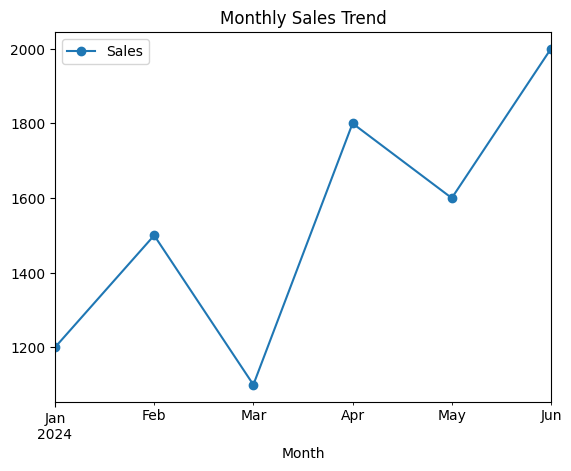

In [63]:
df_g.plot(x="Month", y="Sales", kind="line", marker="o", title="Monthly Sales Trend")
plt.show()

#### 柱状图：各地区的销售额对比

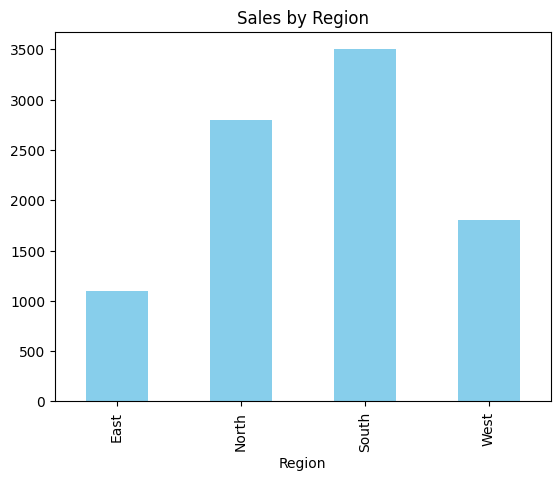

In [64]:
df_g.groupby("Region")["Sales"].sum().plot(kind="bar", title="Sales by Region", color="skyblue")
plt.show()

#### 条形图：各产品的利润对比

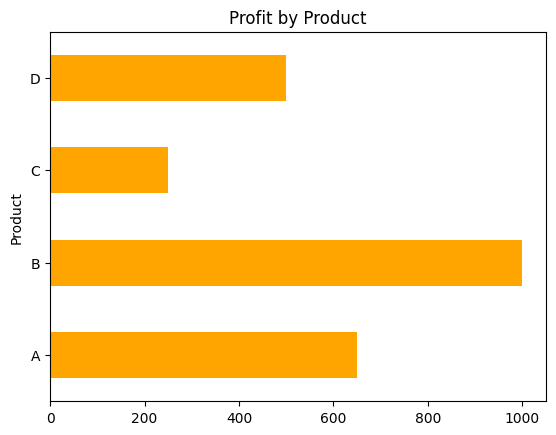

In [65]:
df_g.groupby("Product")["Profit"].sum().plot(kind="barh", title="Profit by Product", color="orange")
plt.show()

#### 饼图：各个地区的销售额占比

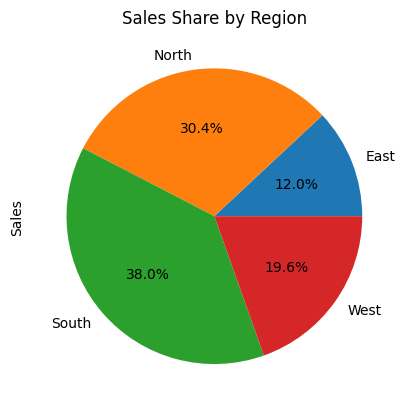

In [66]:
df_g.groupby("Region")["Sales"].sum().plot(
    kind="pie", autopct="%1.1f%%", title="Sales Share by Region"
)
plt.show()

#### 直方图：销售额分布

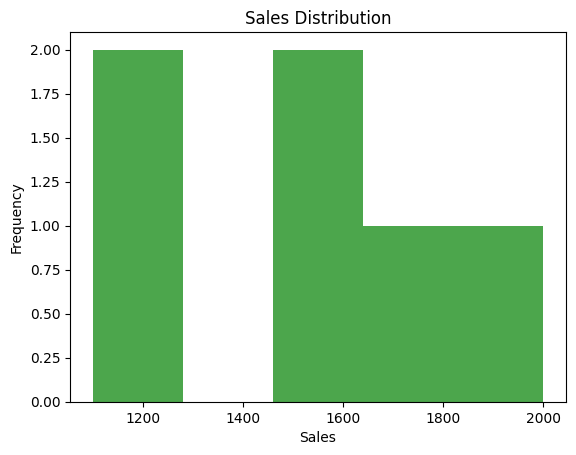

In [67]:
df_g["Sales"].plot(kind="hist", bins=5, title="Sales Distribution", color="green", alpha=0.7)
plt.xlabel("Sales")
plt.show()

#### 散点图：销售额和利润之间的关系

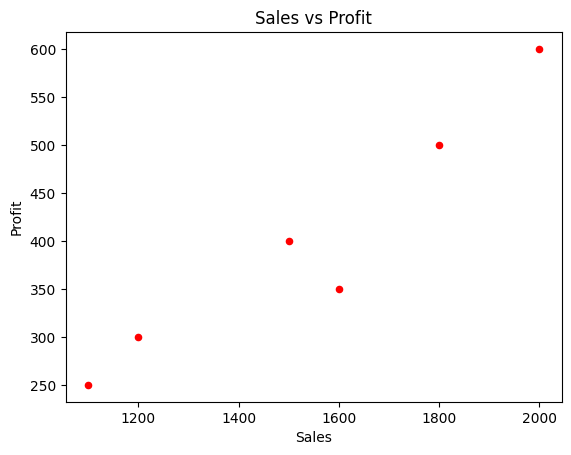

In [68]:
df_g.plot(kind="scatter", x="Sales", y="Profit", title="Sales vs Profit", color="red")
plt.show()

看完了多种多样绘制出来的图片，你是否会感觉到美观度上仍需调整🤔？事实上我们可以对画布进行参数上的调整让它更加美观，`pandas` 集成了 `matplotlib` 的绝大部分参数和功能，可以对照下标自行尝试，对图表进行美化操作。

| 参数         | 说明                                                                                                                                                             |
| ---------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `kind`     | 指定图表类型，如 `'line'`（折线图，默认）、`'bar'`（柱状图）、`'barh'`（条形图）、`'hist'`（直方图）、`'box'`（箱线图）、`'kde'`（核密度估计）、`'area'`（面积图）、`'pie'`（饼图）、`'scatter'`（散点图，仅 `Series` 和 `DataFrame` 支持）等 |
| `x`        | 指定作为横坐标的列名（常用于散点图、折线图等）                                                                                                                                        |
| `y`        | 指定作为纵坐标的列名，可以是单列或多列                                                                                                                                            |
| `title`    | 设置图表标题                                                                                                                                                         |
| `color`    | 设置线条或柱子的颜色，可以是字符串（如 `'red'`）或颜色列表                                                                                                                              |
| `style`    | 设置线条样式（如 `'-'` 实线，`'--'` 虚线，`'o'` 点线）                                                                                                                          |
| `alpha`    | 设置透明度（ `0-1` 之间的数值，越小越透明）                                                                                                                                          |
| `grid`     | 是否显示网格线（布尔值 `True/False`）                                                                                                                                      |
| `legend`   | 是否显示图例（布尔值，默认 `True`）                                                                                                                                          |
| `figsize`  | 设置图表大小，如 `(10, 6)`                                                                                                                                             |
| `fontsize` | 设置刻度字体大小                                                                                                                                                       |
| `xticks`   | 自定义x轴刻度值                                                                                                                                                       |
| `yticks`   | 自定义y轴刻度值                                                                                                                                                       |
| `xlim`     | 设置x轴显示范围，如 `(0, 100)`                                                                                                                                          |
| `ylim`     | 设置y轴显示范围                                                                                                                                                       |
| `marker`   | 指定标记样式（如 `'o'` 圆点，`'s'` 方块，`'^'` 三角）                                                                                                                           |
| `subplots` | 是否将不同列分别绘制在子图上（布尔值）                                                                                                                                            |
| `sharex`   | 当使用子图时，是否共享 `x` 轴                                                                                                                                                  |
| `sharey`   | 当使用子图时，是否共享 `y` 轴                                                                                                                                                  |

需要指出，`matplotlib` 作为通用绘图库，对数据可视化能够提供的定制是**有限**的，如果有更高级的需求，可以了解一下更专门的数据可视化工具，比如 [seaborn](https://github.com/mwaskom/seaborn)、[plotly](https://github.com/plotly/plotly.py)、[qgrid](https://github.com/quantopian/qgrid)、[streamlit](https://github.com/streamlit/streamlit) 等，欢迎同学们自行学习👏